In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings

In [2]:
#Data Exploration
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#the dimensions of the data set
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [5]:
#1 means the person is diabetic and 0 means a person is not.
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

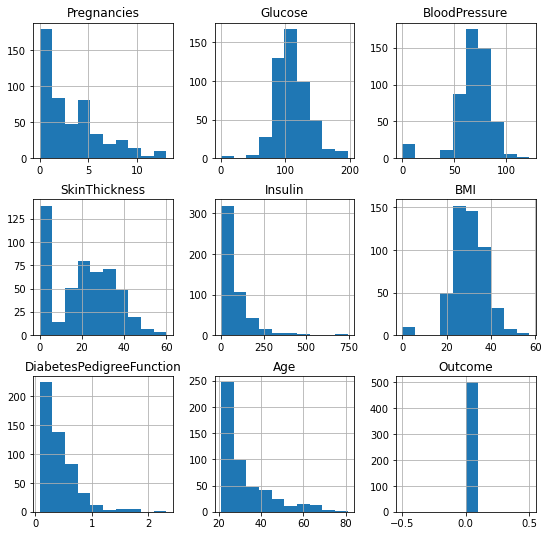

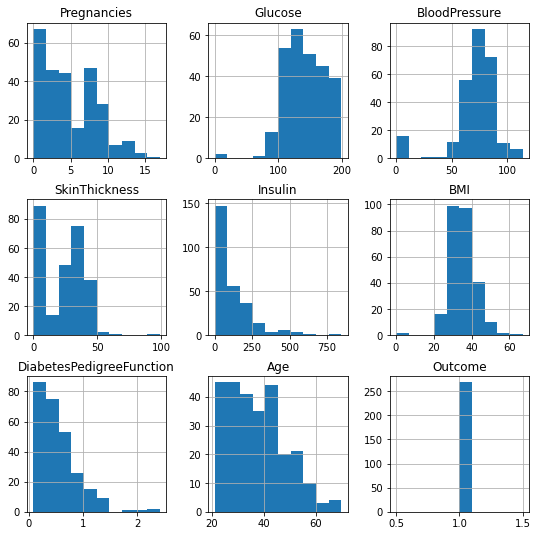

In [6]:
#Visualizating the data
diabetes.groupby('Outcome').hist(figsize=(9, 9))

# Data Cleaning


In [7]:
#checking for duplication
print(diabetes.duplicated().sum())

0


In [8]:
#Missing or Null Data points
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no data points missing in the data set.

#### Unexpected Outliers

#### BloodPressure

In [9]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


In [10]:
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


#### Glucose

In [11]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

Total :  5


In [12]:
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


#### SkinThickness

In [13]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])

Total :  227


In [14]:
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Outcome
0    139
1     88
Name: Age, dtype: int64


#### BMI

In [15]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])

Total :  11


In [16]:
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Outcome
0    9
1    2
Name: Age, dtype: int64


#### Insulin 

In [17]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])

Total :  374


In [18]:
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Outcome
0    236
1    138
Name: Age, dtype: int64


In [19]:
#remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [20]:
#Assign the features to the X variable and the response to the y variable.
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [21]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

### Classification

#### Random Forest (RF)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Predict and Evaluate Accurancy

In [23]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [24]:
from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7615062761506276


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.67      0.56      0.61        79

    accuracy                           0.76       239
   macro avg       0.73      0.71      0.72       239
weighted avg       0.75      0.76      0.76       239



In [26]:
#Getting feature importances
rfc.feature_importances_

array([0.08348107, 0.25562965, 0.08560032, 0.07126095, 0.07739892,
       0.15396052, 0.12887707, 0.14379151])

<AxesSubplot:>

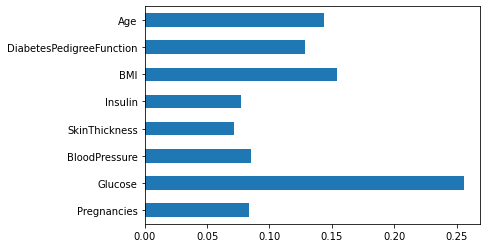

In [27]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [28]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.97 , 0.03 ],
       [0.555, 0.445],
       [0.785, 0.215],
       [0.93 , 0.07 ],
       [0.75 , 0.25 ],
       [0.61 , 0.39 ],
       [0.65 , 0.35 ],
       [0.265, 0.735],
       [0.985, 0.015],
       [0.95 , 0.05 ],
       [0.645, 0.355],
       [0.375, 0.625],
       [0.54 , 0.46 ],
       [0.385, 0.615],
       [0.81 , 0.19 ],
       [0.92 , 0.08 ],
       [0.895, 0.105],
       [0.565, 0.435],
       [0.94 , 0.06 ],
       [0.23 , 0.77 ],
       [0.525, 0.475],
       [0.54 , 0.46 ],
       [0.925, 0.075],
       [0.94 , 0.06 ],
       [0.96 , 0.04 ],
       [0.535, 0.465],
       [0.82 , 0.18 ],
       [0.94 , 0.06 ],
       [0.23 , 0.77 ],
       [0.735, 0.265],
       [0.2  , 0.8  ],
       [0.725, 0.275],
       [0.715, 0.285],
       [0.985, 0.015],
       [0.205, 0.795],
       [0.94 , 0.06 ],
       [0.81 , 0.19 ],
       [0.955, 0.045],
       [0.245, 0.755],
       [0.14 , 0.86 ],
       [0.8  , 0.2  ],
       [0.845, 0.155],
       [0.185, 0.815],
       [0.9

In [29]:
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
 
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [32]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [33]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0], dtype=int64)